In [296]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")

clinical_trial_data = pd.read_csv("clinicaltrial_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data,on="Mouse ID")
combined_df = pd.DataFrame(combined_data)
# Display the data table for preview
#combined_data.head(100)
combined_df.head(100)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [111]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#average_tumor_volume = combined_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
average_tumor_volume = combined_df.groupby(['Drug', 'Timepoint'],as_index=False).agg({'Tumor Volume (mm3)': "mean"})
# Preview DataFrame
average_tumor_volume.head()

#df = average_tumor_volume.to_frame().reset_index()

# Convert to DataFrame
#df = pd.DataFrame(data = [average_tumor_volume])
#df = df.T



# Preview DataFrame
#df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [133]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

standard_error_data = combined_df.groupby(['Drug', 'Timepoint'],as_index=False).agg({'Tumor Volume (mm3)': "sem"})

# Convert to DataFrame


# Preview DataFrame
standard_error_data.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [276]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df = average_tumor_volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
reformat_df_se = standard_error_data.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
reformat_df
reformat_df_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [278]:
df1 = reformat_df[['Capomulin','Infubinol','Ketapril','Placebo']]
df1


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


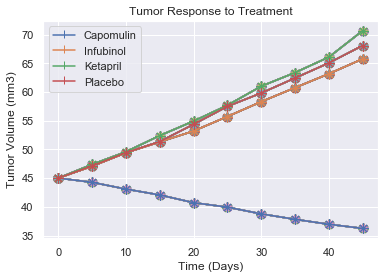

In [291]:
import itertools
    
x1 = list(df1.index)

markers = [(i, j,0) for i in range(1, 11) for j in range(1, 3)]
[plt.plot(x1,df1.values, marker=markers[i], ms=10) for i in range(16)]
plt.xlabel('Time (Days)') 
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'], loc='upper left')

plt.savefig('tumor Response to Treatment')

In [294]:
average_tumor_volume_site = combined_df.groupby(['Drug', 'Timepoint'],as_index=False).agg({'Metastatic Sites': "mean"})
# Preview DataFrame
average_tumor_volume_site.head()
standard_error_data_site = combined_df.groupby(['Drug', 'Timepoint'],as_index=False).agg({'Metastatic Sites': "sem"})
# Minor Data Munging to Re-Format the Data Frames
reformat_df_site = average_tumor_volume_site.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
reformat_df_site_se = standard_error_data_site.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
df2 = reformat_df_site_se[['Capomulin','Infubinol','Ketapril','Placebo']]
df2
reformat_df_site
reformat_df_site_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


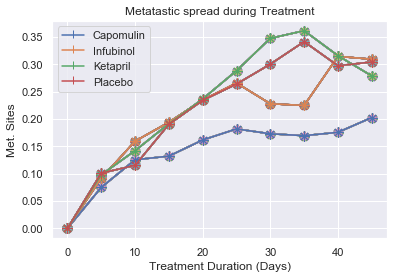

In [341]:

x2 = list(df2.index)

markers = [(i, j,0) for i in range(1, 11) for j in range(1, 3)]
[plt.plot(x2,df2.values, marker=markers[i], ms=10) for i in range(16)]
plt.xlabel('Treatment Duration (Days)') 
plt.ylabel('Met. Sites') 
plt.title('Metatastic spread during Treatment')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'], loc='upper left')


plt.savefig('Metatastic spread during Treatment')

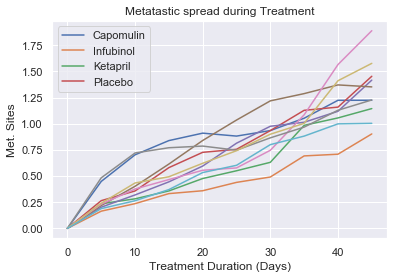

In [301]:
# Checking out seaborn functionality
import seaborn as sns; sns.set()
ax = sns.lineplot(x='Timepoint', y='Tumor Volume (mm3)', hue='Drug', err_style="bars", data=standard_error_data).set_title('Metatastic spread during Treatment')
plt.xlabel('Treatment Duration (Days)') 
plt.ylabel('Met. Sites') 
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'], loc='upper left')

Text(3.200000000000003, 0.5, 'Tumor Response to Treatment')

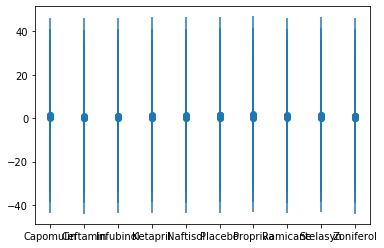

In [165]:
# Generate the Plot (with Error Bars)

plt.errorbar(standard_error_data['Drug'], standard_error_data['Tumor Volume (mm3)'], yerr = standard_error_data['Timepoint'], fmt="o")


ax.set_xlabel("Drug")
ax.set_ylabel("Tumor Response to Treatment")
# Save the Figure



In [160]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [150]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [331]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_of_mice = combined_df.groupby(['Drug', 'Timepoint'],as_index=False).agg({'Mouse ID': "count"})
# Convert to DataFrame
count_of_mice.head()
# Preview DataFrame


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [314]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df_mice_count = count_of_mice.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview the Data Frame
reformat_df_mice_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug       Capomulin  Infubinol  Ketapril  Placebo
Timepoint                                         
0              100.0      100.0     100.0    100.0
5              100.0      100.0      92.0     96.0
10             100.0       84.0      88.0     96.0
15              96.0       84.0      76.0     80.0
20              92.0       80.0      76.0     76.0
25              88.0       72.0      76.0     68.0
30              88.0       68.0      72.0     60.0
35              88.0       48.0      68.0     56.0
40              84.0       40.0      60.0     48.0
45              84.0       36.0      44.0     44.0


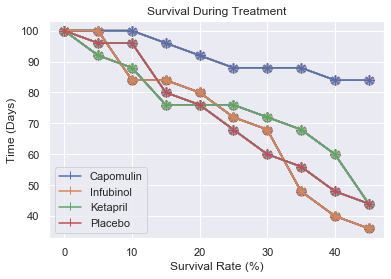

In [340]:
# Generate the Plot (Accounting for percentages)
Perc_calc_for_graph = 100*(reformat_df_mice_count[cols]/reformat_df_mice_count[cols].iloc[0])
df3 = Perc_calc_for_graph[['Capomulin','Infubinol','Ketapril','Placebo']]
x3 = list(df3.index)

markers = [(i, j,0) for i in range(1, 11) for j in range(1, 3)]
[plt.plot(x3,df3.values, marker=markers[i], ms=10) for i in range(16)]
plt.xlabel('Survival Rate (%)') 
plt.ylabel('Time (Days)') 
plt.title('Survival During Treatment')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'], loc='lower left')
print(df3)
# Save the Figure
plt.savefig('Survival During Treatment')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [369]:
# Calculate the percent changes for each drug - using the data from the average tumor growth
#cols = reformat_df_mice_count.columns
cols = reformat_df.columns
#survival_rate = 100*(reformat_df_mice_count[cols].iloc[-1]/reformat_df_mice_count[cols].iloc[0]-1)
survival_rate = 100*(reformat_df[cols].iloc[-1]/reformat_df[cols].iloc[0]-1)

                   


survival_rate_df = pd.DataFrame(survival_rate)
# Display the data to confirm
#print(survival_rate)
survival_rate_df


,0
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [321]:
perc_changes = reformat_df_mice_count.pct_change()
print(perc_changes)

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0                NaN        NaN        NaN        NaN        NaN        NaN   
5           0.000000 -16.000000   0.000000  -8.000000  -8.000000  -4.000000   
10          0.000000  -4.761905 -16.000000  -4.347826  -8.695652   0.000000   
15         -4.000000  -5.000000   0.000000 -13.636364   0.000000 -16.666667   
20         -4.166667  -5.263158  -4.761905   0.000000  -4.761905  -5.000000   
25         -4.347826   0.000000 -10.000000   0.000000 -10.000000 -10.526316   
30          0.000000 -11.111111  -5.555556  -5.263158 -16.666667 -11.764706   
35          0.000000 -12.500000 -29.411765  -5.555556   0.000000  -6.666667   
40         -4.545455   0.000000 -16.666667 -11.764706   0.000000 -14.285714   
45          0.000000  -7.142857 -10.000000 -26.666667 -13.333333  -8.333333   

Drug        Propriva  Ramicane   Stelasyn  Zonifero

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

AttributeError: 'DataFrame' object has no attribute 'o'

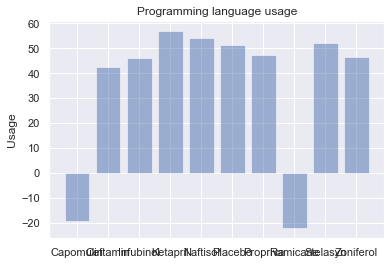

In [373]:
# Store all Relevant Percent Changes into a Tuple

#summary_columns = survival_rate_df.index['Capomulin','Infubinol','Ketapril','Placebo']
y_pos = survival_rate


plt.bar(cols,y_pos, align='center', alpha=0.5)

plt.ylabel('Usage')
plt.title('Programming language usage')
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)